In [ ]:
import math
import io
import os

import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pathname = "/content/drive/My Drive/Richter Project/"
os.chdir(pathname)

Mounted at /content/drive


In [ ]:
filename = "pwt1001.xlsx"

In [ ]:
dt = pd.read_excel(filename)
dt

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.425715,1.778124
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.419446,1.728804
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.418681,1.756007
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.426527,1.830088


In [ ]:
dt = dt[dt['country'] == "United States"]
dt

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
12110,USA,United States,US Dollar,1950,2447945.5,2475627.50,155.583973,62.814365,1990.144875,2.583213,...,0.043342,-0.039559,-0.002953,0.115940,0.118270,0.152379,0.084418,0.076621,0.084862,NaN
12111,USA,United States,US Dollar,1951,2620618.5,2660815.75,158.247704,65.092644,2031.635134,2.596000,...,0.053067,-0.042812,-0.001599,0.124587,0.126354,0.156107,0.087984,0.082458,0.093183,NaN
12112,USA,United States,US Dollar,1952,2718999.0,2751933.50,160.980892,65.884354,2027.812612,2.608850,...,0.047457,-0.042813,-0.002992,0.127091,0.124663,0.157949,0.091286,0.083088,0.095605,NaN
12113,USA,United States,US Dollar,1953,2852665.5,2878352.50,163.669147,66.820717,2021.450284,2.621764,...,0.040463,-0.041543,-0.003737,0.128677,0.124946,0.159089,0.094769,0.085481,0.096045,NaN
12114,USA,United States,US Dollar,1954,2838248.5,2869544.25,166.572976,65.598328,1998.127345,2.634742,...,0.042020,-0.039177,-0.003399,0.129891,0.126188,0.164575,0.094824,0.087784,0.095792,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,USA,United States,US Dollar,2015,18905122.0,18785358.00,320.878310,150.248474,1770.023174,3.728116,...,0.119109,-0.171910,0.015626,0.939043,0.901439,1.243926,0.671554,0.716726,0.949881,1.0
12176,USA,United States,US Dollar,2016,19285252.0,19095196.00,323.015995,152.396957,1766.744125,3.733411,...,0.113846,-0.164109,0.015137,0.950885,0.918794,1.224623,0.667374,0.717047,0.968179,1.0
12177,USA,United States,US Dollar,2017,19754754.0,19542980.00,325.084756,154.672318,1763.726676,3.738714,...,0.115603,-0.170726,0.015552,0.969497,0.934584,1.213737,0.684219,0.720900,1.000000,1.0
12178,USA,United States,US Dollar,2018,20369440.0,20155260.00,327.096265,156.675903,1774.703811,3.744024,...,0.117129,-0.173503,0.016334,0.990763,0.963756,1.251203,0.706347,0.747758,1.038333,1.0


In [ ]:
print(dt['year'].unique())

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [ ]:
base_year = 1956
gdp_base = dt.loc[dt['year'] == base_year, 'rgdpna'].values[0]
tfp_base = dt.loc[dt['year'] == base_year, 'rtfpna'].values[0]

dt['gdp_index'] = dt['rgdpna'] / gdp_base * 100
dt['tfp_index'] = dt['rtfpna'] / tfp_base * 100

/tmp/ipython-input-82-2826046088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['gdp_index'] = dt['rgdpna'] / gdp_base * 100
/tmp/ipython-input-82-2826046088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['tfp_index'] = dt['rtfpna'] / tfp_base * 100


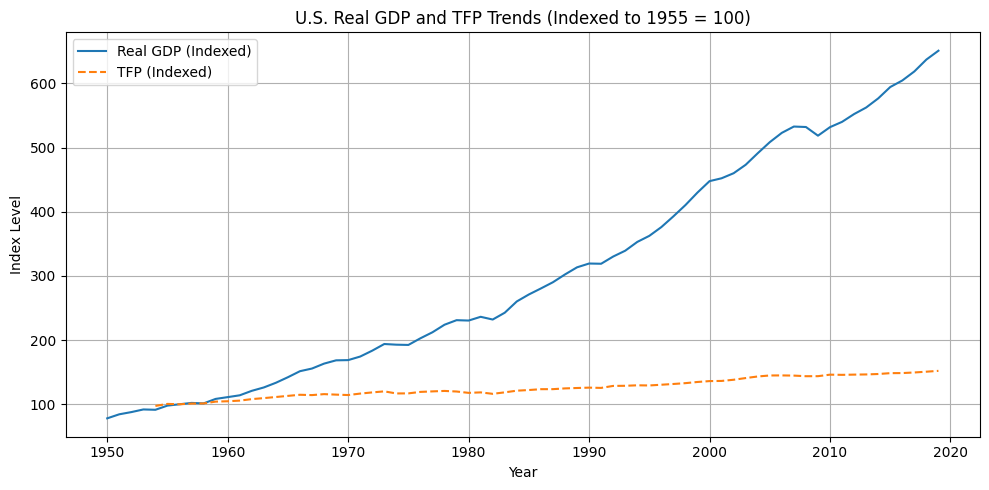

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(dt['year'], dt['gdp_index'], label='Real GDP (Indexed)')
plt.plot(dt['year'], dt['tfp_index'], label='TFP (Indexed)', linestyle='--')
plt.title("U.S. Real GDP and TFP Trends (Indexed to 1955 = 100)")
plt.xlabel("Year")
plt.ylabel("Index Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-84-625002213.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['log_gdp'] = np.log(dt['rgdpna'])
/tmp/ipython-input-84-625002213.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['log_tfp'] = np.log(dt['rtfpna'])  # updated from 'ctfp' to 'rtfpna'


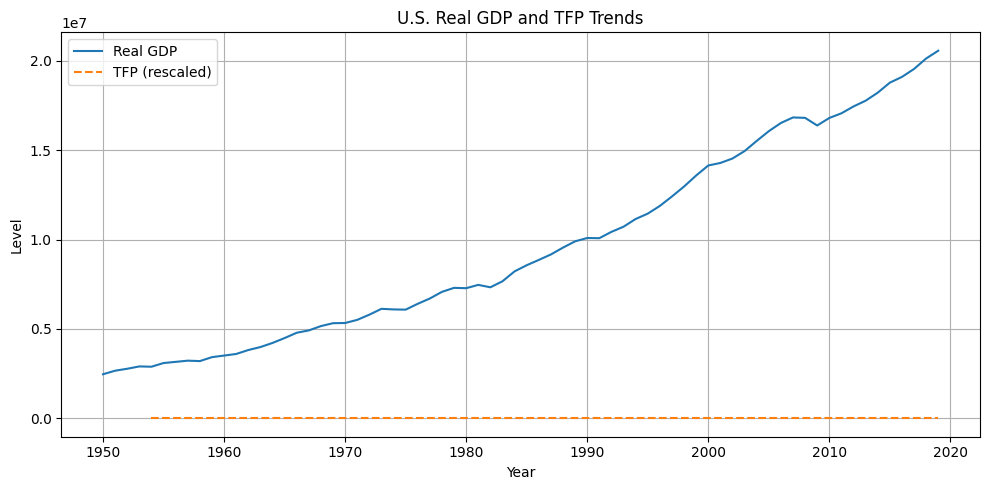

ADF Test on Log GDP
  Test Statistic : -1.9215690283353764
  p-value        : 0.32198337367872987
  Stationary?    : No

ADF Test on Log TFP
  Test Statistic : -1.5386490751879038
  p-value        : 0.5143129894745223
  Stationary?    : No

ADF Test on Diff Log GDP
  Test Statistic : -7.202030841193664
  p-value        : 2.35186838107111e-10
  Stationary?    : Yes

ADF Test on Diff Log TFP
  Test Statistic : -8.187251005273849
  p-value        : 7.839121238754286e-13
  Stationary?    : Yes



/tmp/ipython-input-84-625002213.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['dlog_gdp'] = dt['log_gdp'].diff()
/tmp/ipython-input-84-625002213.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['dlog_tfp'] = dt['log_tfp'].diff()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# --- Log Transformations ---
dt['log_gdp'] = np.log(dt['rgdpna'])
dt['log_tfp'] = np.log(dt['rtfpna'])  # updated from 'ctfp' to 'rtfpna'

# --- Plot GDP and TFP Trends ---
plt.figure(figsize=(10, 5))
plt.plot(dt['year'], dt['rgdpna'], label='Real GDP')
plt.plot(dt['year'], dt['rtfpna'] * 100, label='TFP (rescaled)', linestyle='--')  # updated
plt.title("U.S. Real GDP and TFP Trends")
plt.xlabel("Year")
plt.ylabel("Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- ADF Test Function ---
def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"ADF Test on {name}")
    print(f"  Test Statistic : {result[0]}")
    print(f"  p-value        : {result[1]}")
    print(f"  Stationary?    : {'Yes' if result[1] < 0.05 else 'No'}\n")

# --- Run ADF Tests on Log-Level Series ---
adf_test(dt['log_gdp'], 'Log GDP')
adf_test(dt['log_tfp'], 'Log TFP')

# --- First Differences if Needed ---
dt['dlog_gdp'] = dt['log_gdp'].diff()
dt['dlog_tfp'] = dt['log_tfp'].diff()

# --- ADF Test on Differenced Series ---
adf_test(dt['dlog_gdp'], 'Diff Log GDP')
adf_test(dt['dlog_tfp'], 'Diff Log TFP')

In [ ]:
dt['log_gdp'] = np.log(dt['rgdpna'])
dt['log_tfp'] = np.log(dt['rtfpna'])
dt['log_capital'] = np.log(dt['rkna'])

/tmp/ipython-input-85-3098904877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['log_gdp'] = np.log(dt['rgdpna'])
/tmp/ipython-input-85-3098904877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['log_tfp'] = np.log(dt['rtfpna'])
/tmp/ipython-input-85-3098904877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
dt['dlog_gdp'] = dt['log_gdp'].diff()
dt['dlog_tfp'] = dt['log_tfp'].diff()
dt['dlog_capital'] = dt['log_capital'].diff()

/tmp/ipython-input-86-2263283192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['dlog_gdp'] = dt['log_gdp'].diff()
/tmp/ipython-input-86-2263283192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['dlog_tfp'] = dt['log_tfp'].diff()
/tmp/ipython-input-86-2263283192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
dt = dt.dropna(subset=['dlog_gdp', 'dlog_tfp', 'dlog_capital'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"ADF Test on {name}")
    print(f"  Test Statistic : {result[0]}")
    print(f"  p-value        : {result[1]}")
    print(f"  Stationary?    : {'Yes' if result[1] < 0.05 else 'No'}\n")

In [ ]:
adf_test(dt['log_gdp'], 'Log GDP')
adf_test(dt['log_tfp'], 'Log TFP')
adf_test(dt['dlog_gdp'], 'Diff Log GDP')
adf_test(dt['dlog_tfp'], 'Diff Log TFP')

ADF Test on Log GDP
  Test Statistic : -2.1800785084800163
  p-value        : 0.21355508910536747
  Stationary?    : No

ADF Test on Log TFP
  Test Statistic : -0.9830102646266238
  p-value        : 0.7594103717111671
  Stationary?    : No

ADF Test on Diff Log GDP
  Test Statistic : -6.434901902699307
  p-value        : 1.6621358099094016e-08
  Stationary?    : Yes

ADF Test on Diff Log TFP
  Test Statistic : -8.187251005273849
  p-value        : 7.839121238754286e-13
  Stationary?    : Yes



In [ ]:
dt['dlog_tfp'] = dt['log_tfp'].diff()

/tmp/ipython-input-90-755812773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['dlog_tfp'] = dt['log_tfp'].diff()


In [ ]:
dt = dt.dropna(subset=['dlog_tfp'])

In [ ]:
adf_test(dt['dlog_tfp'], 'Differenced Log TFP')

ADF Test on Differenced Log TFP
  Test Statistic : -7.49922714290623
  p-value        : 4.297561664366016e-11
  Stationary?    : Yes



Week 2: ARIMAX

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'unique_id': 'log_gdp',             # one time series
    'ds': pd.to_datetime(dt['year'], format='%Y'),  # ensure datetime format
    'y': dt['log_gdp']                  # your target variable
})

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

sf = StatsForecast(
    models=[AutoARIMA(season_length=1)],
    freq='Y',
    n_jobs=-1
)

sf = sf.fit(df)  # df must contain: unique_id, ds (dates), y (log_gdp)
forecast = sf.predict(h=12, level=[95])

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


In [ ]:
df['ds'] = pd.to_datetime(df['ds'], format='%Y')  # convert year to datetime

In [ ]:
sf = StatsForecast(
    models=[AutoARIMA(season_length=1)],  # No seasonality
    freq='Y',                             # Annual data
    n_jobs=-1                             # Use all CPU cores
)

sf = sf.fit(df)

In [ ]:
forecast = sf.predict(h=12, level=[95])
print(forecast)

   unique_id         ds  AutoARIMA  AutoARIMA-lo-95  AutoARIMA-hi-95
0    log_gdp 2019-12-31  16.862580        16.822646        16.902514
1    log_gdp 2020-12-31  16.887456        16.820848        16.954063
2    log_gdp 2021-12-31  16.912331        16.825247        16.999415
3    log_gdp 2022-12-31  16.937206        16.832082        17.042331
4    log_gdp 2023-12-31  16.962082        16.840202        17.083962
5    log_gdp 2024-12-31  16.986957        16.849081        17.124834
6    log_gdp 2025-12-31  17.011833        16.858430        17.165235
7    log_gdp 2026-12-31  17.036708        16.868074        17.205342
8    log_gdp 2027-12-31  17.061584        16.877898        17.245269
9    log_gdp 2028-12-31  17.086459        16.887821        17.285097
10   log_gdp 2029-12-31  17.111334        16.897786        17.324883
11   log_gdp 2030-12-31  17.136210        16.907751        17.364669


/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


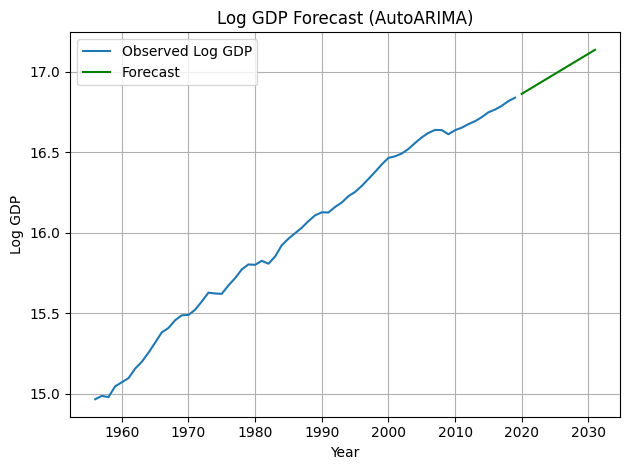

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['ds'], df['y'], label='Observed Log GDP')

plt.plot(forecast['ds'], forecast['AutoARIMA'], label='Forecast', color='green')

plt.title('Log GDP Forecast (AutoARIMA)')
plt.xlabel('Year')
plt.ylabel('Log GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
forecast['GDP'] = np.exp(forecast['AutoARIMA'])

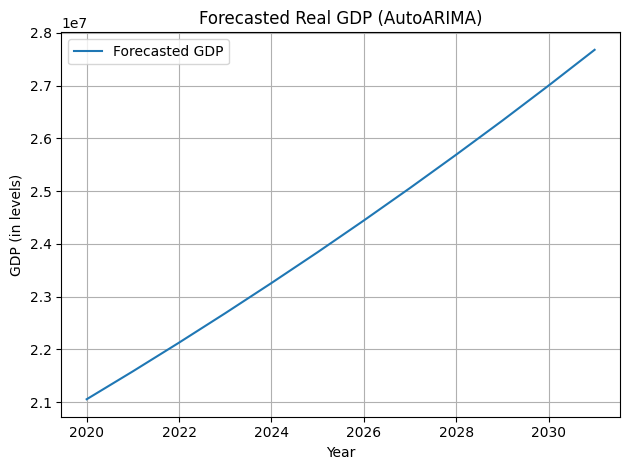

In [ ]:
plt.plot(forecast['ds'], forecast['GDP'], label='Forecasted GDP')
plt.title('Forecasted Real GDP (AutoARIMA)')
plt.xlabel('Year')
plt.ylabel('GDP (in levels)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
forecast = sf.predict(h=12, level=[95])

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


In [ ]:
forecast[['ds', 'AutoARIMA', 'AutoARIMA-lo-95', 'AutoARIMA-hi-95']].head()

,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
0,2019-12-31,16.862580,16.822646,16.902514
1,2020-12-31,16.887456,16.820848,16.954063
2,2021-12-31,16.912331,16.825247,16.999415
3,2022-12-31,16.937206,16.832082,17.042331
4,2023-12-31,16.962082,16.840202,17.083962


In [ ]:
# Calculate annual growth rates in %
forecast['gdp_growth_rate'] = forecast['AutoARIMA'].diff() * 100

# Drop the first row (NaN growth for first year)
forecast_growth = forecast[['ds', 'AutoARIMA', 'gdp_growth_rate']].dropna()

# Display result
print(forecast_growth)

           ds  AutoARIMA  gdp_growth_rate
1  2020-12-31  16.887456         2.487543
2  2021-12-31  16.912331         2.487543
3  2022-12-31  16.937206         2.487543
4  2023-12-31  16.962082         2.487543
5  2024-12-31  16.986957         2.487543
6  2025-12-31  17.011833         2.487543
7  2026-12-31  17.036708         2.487543
8  2027-12-31  17.061584         2.487543
9  2028-12-31  17.086459         2.487543
10 2029-12-31  17.111334         2.487543
11 2030-12-31  17.136210         2.487543


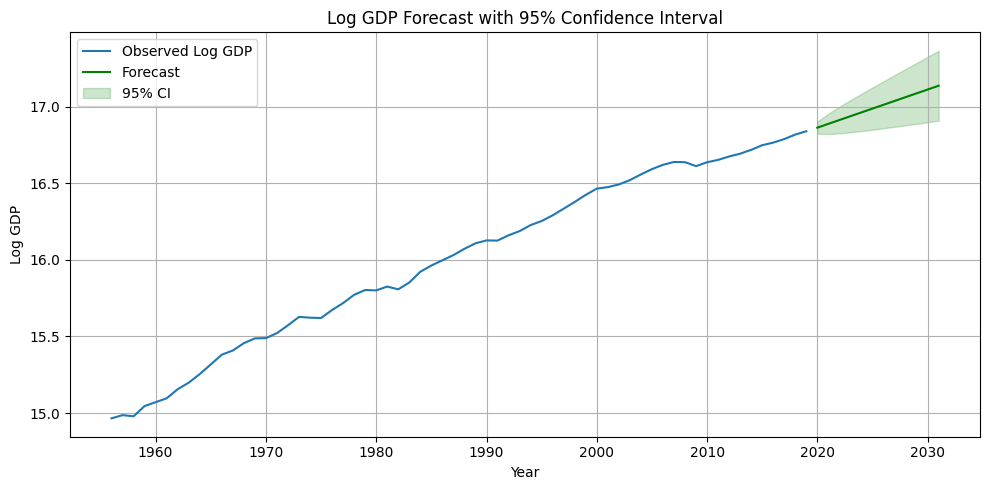

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Observed
plt.plot(df['ds'], df['y'], label='Observed Log GDP')

# Forecast
plt.plot(forecast['ds'], forecast['AutoARIMA'], label='Forecast', color='green')

# 95% CI
plt.fill_between(
    forecast['ds'],
    forecast['AutoARIMA-lo-95'],
    forecast['AutoARIMA-hi-95'],
    color='green', alpha=0.2, label='95% CI'
)

plt.title('Log GDP Forecast with 95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Log GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(forecast.columns)

Index(['unique_id', 'ds', 'AutoARIMA', 'AutoARIMA-lo-95', 'AutoARIMA-hi-95',
       'gdp_growth_rate'],
      dtype='object')


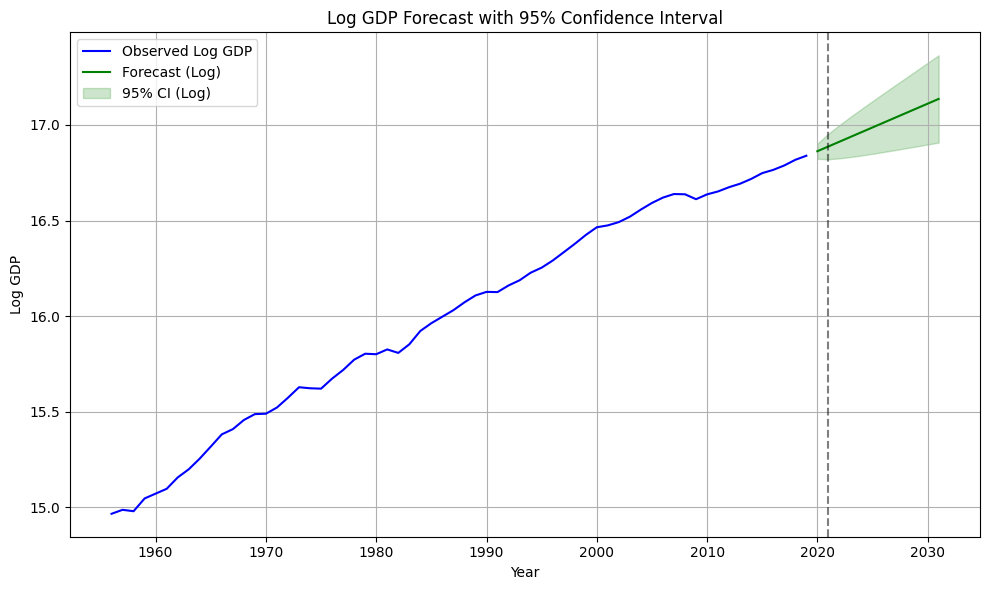

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Log GDP Plot ---
plt.figure(figsize=(10, 6))

# Plot observed log GDP
plt.plot(df['ds'], df['y'], label='Observed Log GDP', color='blue')

# Plot forecasted log GDP
plt.plot(forecast['ds'], forecast['AutoARIMA'], label='Forecast (Log)', color='green')

# Confidence Interval
plt.fill_between(forecast['ds'],
                 forecast['AutoARIMA-lo-95'],
                 forecast['AutoARIMA-hi-95'],
                 color='green', alpha=0.2, label='95% CI (Log)')

# Forecast start marker
plt.axvline(x=pd.to_datetime('2020-12-31'), color='black', linestyle='--', alpha=0.5)

# Labels and styling
plt.title('Log GDP Forecast with 95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Log GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

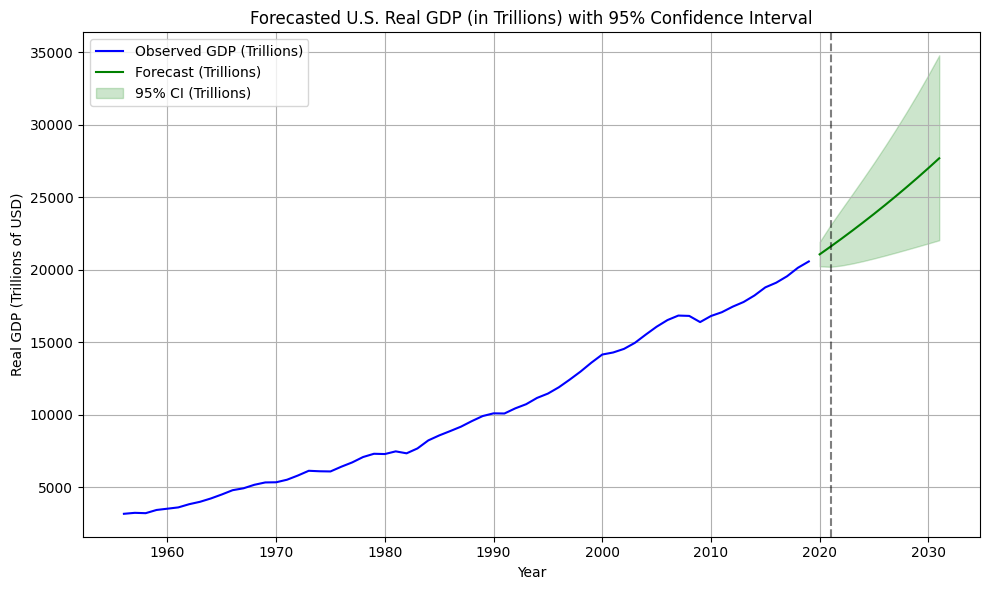

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Transform to Real GDP in Trillions ---
forecast['gdp_trillions'] = np.exp(forecast['AutoARIMA']) / 1e3
forecast['gdp_lo_trillions'] = np.exp(forecast['AutoARIMA-lo-95']) / 1e3
forecast['gdp_hi_trillions'] = np.exp(forecast['AutoARIMA-hi-95']) / 1e3
df['gdp_trillions'] = np.exp(df['y']) / 1e3

# --- Real GDP Plot ---
plt.figure(figsize=(10, 6))

# Plot observed real GDP
plt.plot(df['ds'], df['gdp_trillions'], label='Observed GDP (Trillions)', color='blue')

# Plot forecasted real GDP
plt.plot(forecast['ds'], forecast['gdp_trillions'], label='Forecast (Trillions)', color='green')

# Confidence Interval
plt.fill_between(forecast['ds'],
                 forecast['gdp_lo_trillions'],
                 forecast['gdp_hi_trillions'],
                 color='green', alpha=0.2, label='95% CI (Trillions)')

# Forecast start marker
plt.axvline(x=pd.to_datetime('2020-12-31'), color='black', linestyle='--', alpha=0.5)

# Labels and styling
plt.title('Forecasted U.S. Real GDP (in Trillions) with 95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Real GDP (Trillions of USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Choose test size (e.g., 10 years)
test_size = 10

# Split into train/test
train = df[:-test_size]
test = df[-test_size:]

In [ ]:
print("Training period:", train.index.min(), "to", train.index.max())
print("Testing period:", test.index.min(), "to", test.index.max())

Training period: 1950-12-31 00:00:00 to 2003-12-31 00:00:00
Testing period: 2004-12-31 00:00:00 to 2013-12-31 00:00:00


In [ ]:
# Test conversion using standard Unix epoch origin
converted_dates = pd.to_datetime(df.index, unit='D', origin='1970-01-01')

print("Converted Start:", converted_dates.min())
print("Converted End:", converted_dates.max())

# If this looks correct (around 1950–2019), replace df.index
df.index = converted_dates

Converted Start: 2003-03-05 00:00:00
Converted End: 2003-05-07 00:00:00


In [ ]:
# Now it has 'unique_id', 'ds', 'y' — required by StatsForecast
sf_train = StatsForecast(
    models=[AutoARIMA(season_length=1)],
    freq='Y',
    n_jobs=-1
)
sf_train = sf_train.fit(train)

In [ ]:
# Before fitting, keep only the required columns
train = train[['unique_id', 'ds', 'y']]
test = test[['unique_id', 'ds', 'y']]

# Fit model
sf_train = sf_train.fit(train)

# Predict without exog
forecast_test = sf_train.predict(h=test_size)

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


In [ ]:
results = test.copy()
results['forecast'] = forecast_test['AutoARIMA'].values

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(results['y'], results['forecast'])
mse = mean_squared_error(results['y'], results['forecast'])
rmse = np.sqrt(mse)  # manual RMSE

print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")

MAE  = 0.0348
RMSE = 0.0401


In [ ]:
mape = np.mean(np.abs((results['y'] - results['forecast']) / results['y'])) * 100
print(f"MAPE = {mape:.2f}%")

MAPE = 0.21%


In [ ]:
mpe = np.mean((results['y'] - results['forecast']) / results['y']) * 100
print(f"MPE  = {mpe:.2f}%")

MPE  = -0.20%


In [ ]:
smape = 100 / len(results) * np.sum(
    2 * np.abs(results['forecast'] - results['y']) /
    (np.abs(results['y']) + np.abs(results['forecast']))
)
print(f"sMAPE = {smape:.2f}%")

sMAPE = 0.21%


Week 3:VAR

In [ ]:
from statsmodels.tsa.api import VAR

# Keep relevant columns and drop any NaNs
var_data = dt[['dlog_gdp', 'dlog_tfp', 'dlog_capital']].dropna()

In [ ]:
model = VAR(var_data)
lag_order_results = model.select_order(maxlags=10)
print(lag_order_results.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -27.59      -27.48   1.043e-12      -27.55
1       -30.87     -30.43*   3.926e-14      -30.70
2      -31.14*      -30.37  2.992e-14*     -30.85*
3       -30.99      -29.89   3.507e-14      -30.57
4       -30.77      -29.33   4.459e-14      -30.22
5       -30.53      -28.76   5.811e-14      -29.85
6       -30.59      -28.49   5.687e-14      -29.78
7       -30.35      -27.92   7.639e-14      -29.42
8       -30.46      -27.69   7.444e-14      -29.39
9       -30.38      -27.28   8.963e-14      -29.18
10      -31.11      -27.69   4.962e-14      -29.79
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
var_model = model.fit(2)
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Jul, 2025
Time:                     12:23:18
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -30.1077
Nobs:                     62.0000    HQIC:                  -30.5453
Log likelihood:           712.752    FPE:                4.09952e-14
AIC:                     -30.8282    Det(Omega_mle):     2.97414e-14
--------------------------------------------------------------------
Results for equation dlog_gdp
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.018572         0.010695            1.736           0.082
L1.dlog_gdp            -0.264596         0.440941           -0.600           0.548
L1.dlog_tfp             0.855456         0.555983

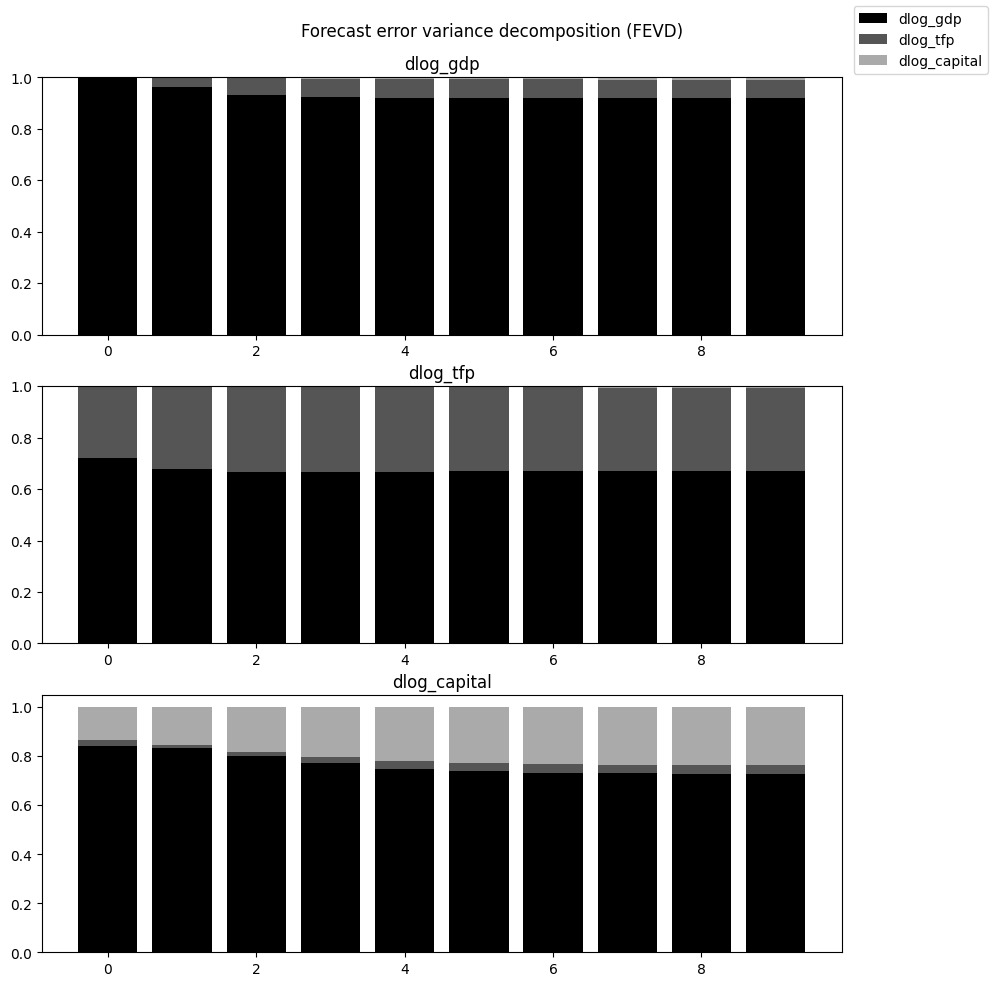

In [ ]:
fevd = var_model.fevd(10)

fevd.plot()
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

IRF's

In [ ]:
var_model = model.fit(2)

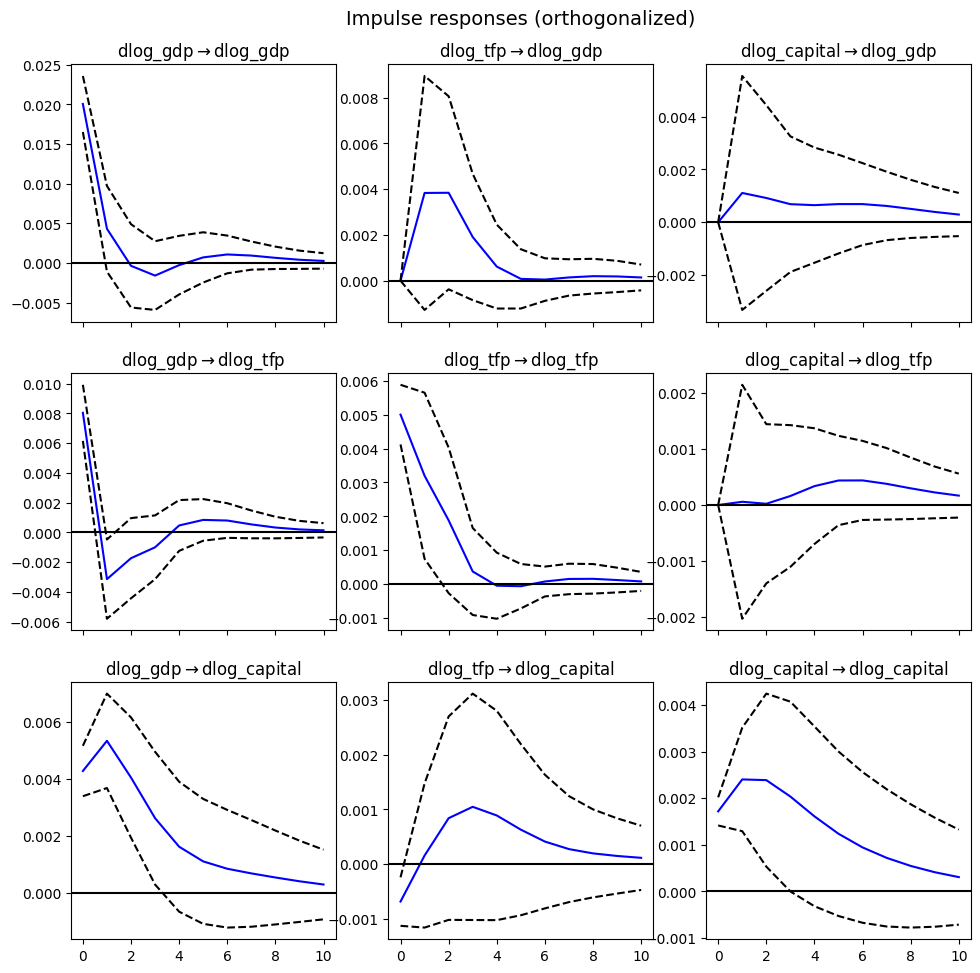

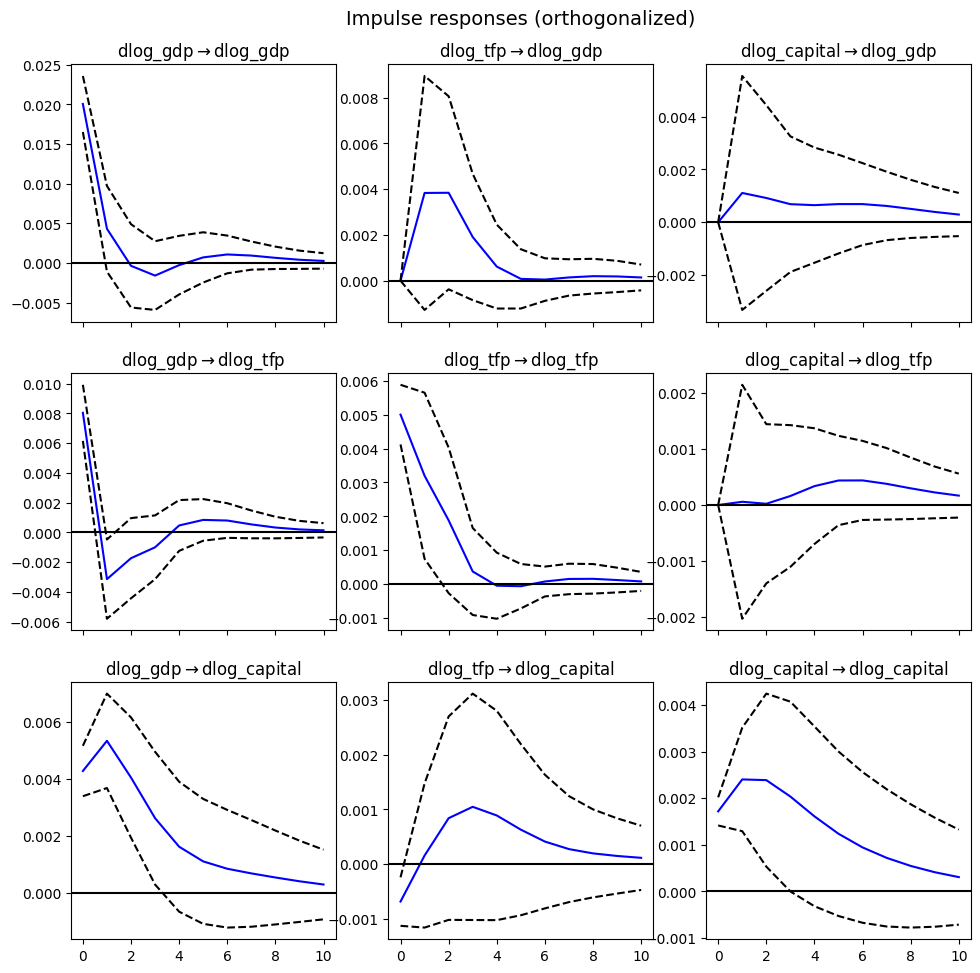

In [ ]:
# Generate IRFs for 10 periods
irf = var_model.irf(10)

# Plot all IRFs
irf.plot(orth=True)

In [ ]:
test_size = 10

# Drop NaNs and keep only relevant variables
var_data = dt[['dlog_gdp', 'dlog_tfp', 'dlog_capital']].dropna()

# Split
train = var_data[:-test_size]
test = var_data[-test_size:]

In [ ]:
from statsmodels.tsa.api import VAR

model = VAR(train)
var_model = model.fit(2)  # use optimal lag you found earlier

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
# Forecast 10 steps ahead
forecast = var_model.forecast(train.values, steps=test_size)

# Convert forecast to DataFrame with same columns
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

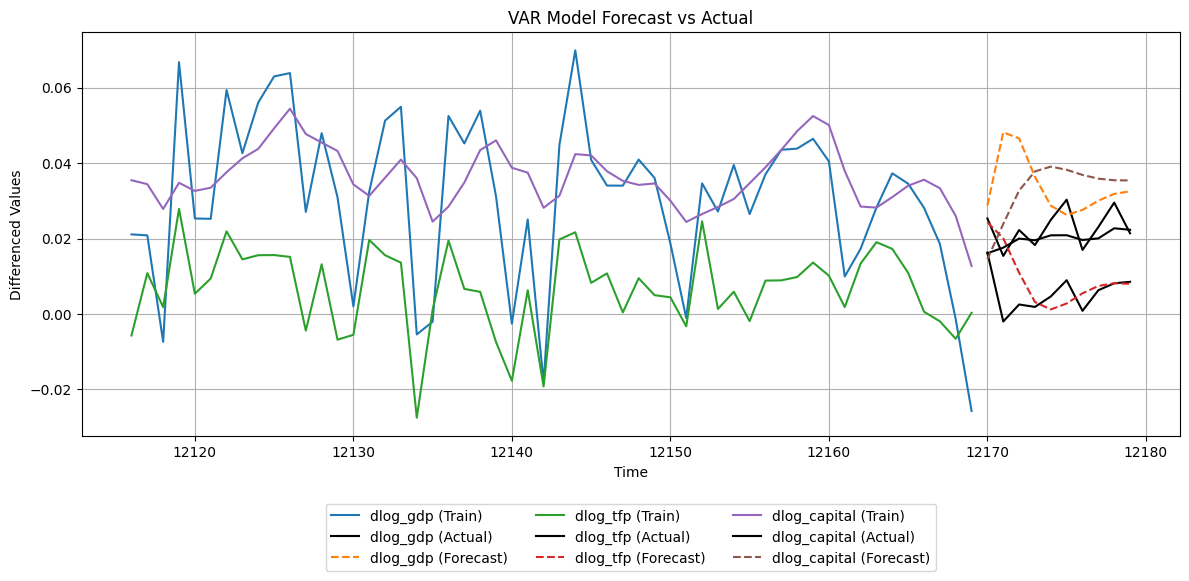

In [ ]:
# Plot actual vs predicted for all variables
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for col in test.columns:
    plt.plot(train.index, train[col], label=f'{col} (Train)')
    plt.plot(test.index, test[col], label=f'{col} (Actual)', color='black')
    plt.plot(test.index, forecast_df[col], label=f'{col} (Forecast)', linestyle='--')

plt.title('VAR Model Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Differenced Values')
plt.legend()
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

for col in test.columns:
    mae = mean_absolute_error(test[col], forecast_df[col])
    rmse = np.sqrt(mean_squared_error(test[col], forecast_df[col]))
    print(f"{col} → MAE: {mae:.4f}, RMSE: {rmse:.4f}")

dlog_gdp → MAE: 0.0117, RMSE: 0.0152
dlog_tfp → MAE: 0.0056, RMSE: 0.0083
dlog_capital → MAE: 0.0133, RMSE: 0.0143


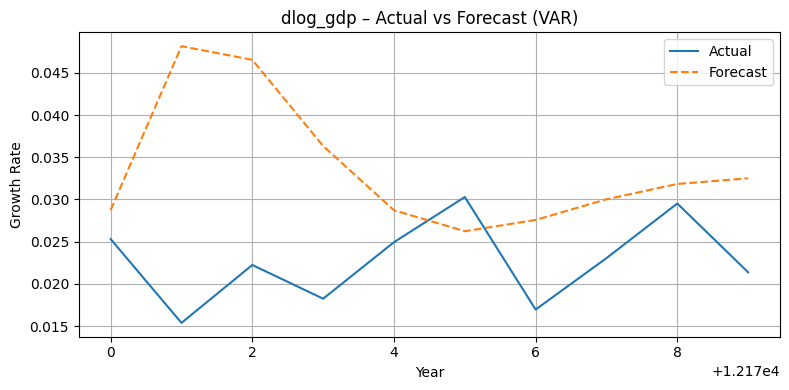

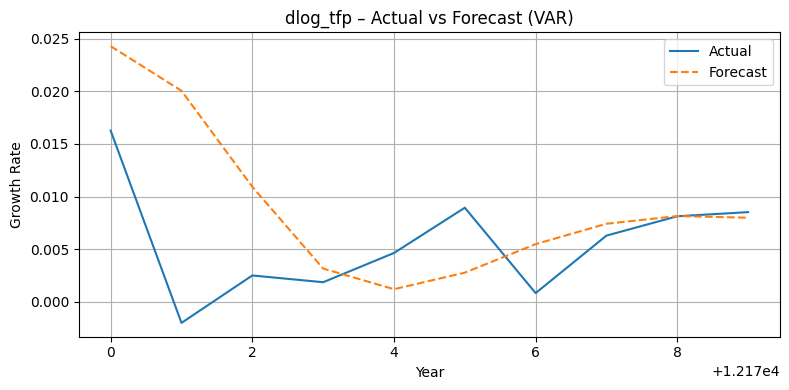

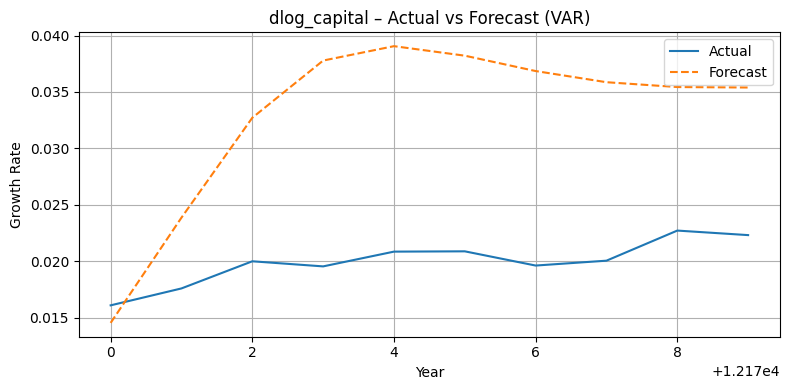

In [ ]:
import matplotlib.pyplot as plt

for col in test.columns:
    plt.figure(figsize=(8, 4))
    plt.plot(test.index, test[col], label='Actual')
    plt.plot(test.index, forecast_df[col], label='Forecast', linestyle='--')
    plt.title(f'{col} – Actual vs Forecast (VAR)')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Step 1: Get last log_gdp before the test period starts
last_log_gdp = dt.loc[test.index[0] - 1, 'log_gdp']  # Adjust if your index is not integer

# Step 2: Reconstruct predicted log_gdp from cumulative sum of dlog_gdp
forecasted_log_gdp = last_log_gdp + forecast_df['dlog_gdp'].cumsum()

# Step 3: Actual log_gdp values from test period
actual_log_gdp = dt.loc[test.index, 'log_gdp']

# Step 4: Compute MAPE and MPE on log_gdp
mape_log = np.mean(np.abs((actual_log_gdp - forecasted_log_gdp) / actual_log_gdp)) * 100
mpe_log = np.mean((actual_log_gdp - forecasted_log_gdp) / actual_log_gdp) * 100

print(f"VAR MAPE (log_gdp) = {mape_log:.2f}%")
print(f"VAR MPE  (log_gdp) = {mpe_log:.2f}%")

VAR MAPE (log_gdp) = 0.44%
VAR MPE  (log_gdp) = -0.44%


ARIMA with exogenous variables

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define target and predictors
y = dt['log_gdp']
X = dt[['log_tfp', 'log_capital']]

# Split
test_size = 10
y_train, y_test = y[:-test_size], y[-test_size:]
X_train, X_test = X[:-test_size], X[-test_size:]

# Fit ARIMAX manually — try (1, 0, 1)
model = ARIMA(endog=y_train, exog=X_train, order=(1, 0, 1))
arimax_result = model.fit()
print(arimax_result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

                               SARIMAX Results                                
Dep. Variable:                log_gdp   No. Observations:                   54
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 170.076
Date:                Wed, 23 Jul 2025   AIC                           -328.152
Time:                        12:23:31   BIC                           -316.218
Sample:                             0   HQIC                          -323.550
                                 - 54                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.8115      0.043    390.985      0.000      16.727      16.896
log_tfp         1.2711      0.144      8.817      0.000       0.989       1.554
log_capital     0.6453      0.046     14.128    

In [ ]:
forecast = arimax_result.predict(start=len(y_train), end=len(y)-1, exog=X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, forecast)
rmse = np.sqrt(mean_squared_error(y_test, forecast))

print(f"ARIMAX MAE  = {mae:.4f}")
print(f"ARIMAX RMSE = {rmse:.4f}")

ARIMAX MAE  = 0.0049
ARIMAX RMSE = 0.0051


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


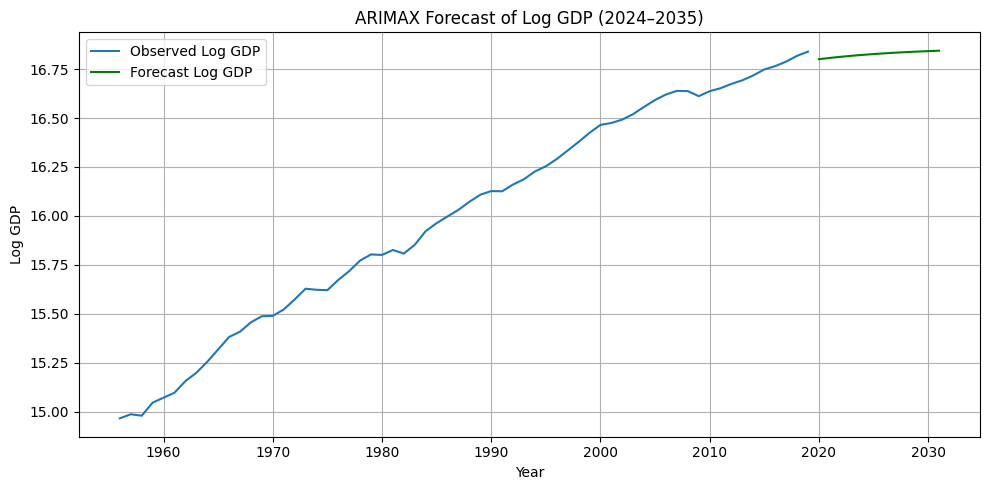

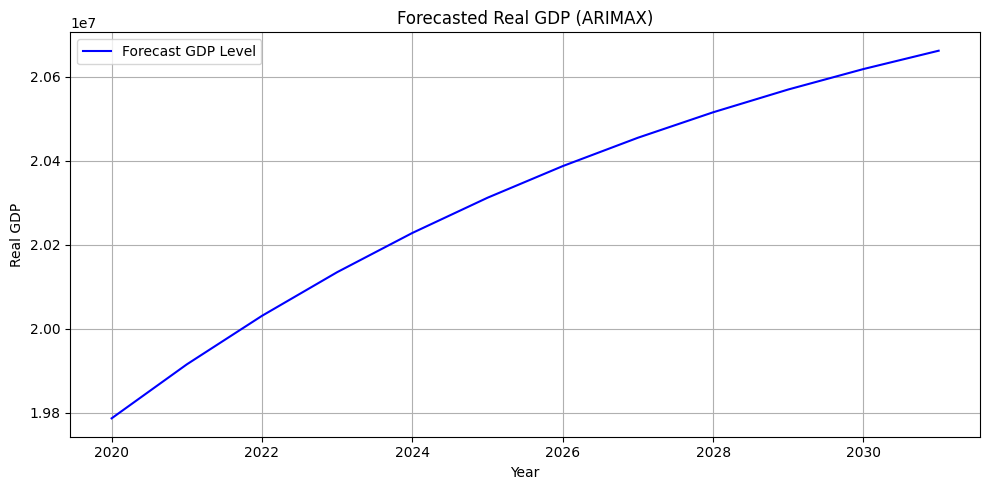

In [ ]:
# Step 1: Create X_future (12 rows of the last known values)
last_log_tfp = dt['log_tfp'].iloc[-1]
last_log_capital = dt['log_capital'].iloc[-1]

X_future = pd.DataFrame({
    'log_tfp': [last_log_tfp] * 12,
    'log_capital': [last_log_capital] * 12
})

# Step 2: Forecast with exogenous variables
forecast_result = arimax_result.get_forecast(steps=12, exog=X_future)

# Step 3: Extract the predicted log-GDP
forecast_log_gdp = forecast_result.predicted_mean

# Step 4: Convert to GDP levels
forecast_gdp = np.exp(forecast_log_gdp)

# Step 5: Generate future years
future_years = list(range(dt['year'].max() + 1, dt['year'].max() + 1 + 12))

# Step 6: Plot log-GDP forecast
plt.figure(figsize=(10, 5))
plt.plot(dt['year'], dt['log_gdp'], label='Observed Log GDP')
plt.plot(future_years, forecast_log_gdp, label='Forecast Log GDP', color='green')
plt.title('ARIMAX Forecast of Log GDP (2024–2035)')
plt.xlabel('Year')
plt.ylabel('Log GDP')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Plot GDP Level Forecast
plt.figure(figsize=(10, 5))
plt.plot(future_years, forecast_gdp, label='Forecast GDP Level', color='blue')
plt.title('Forecasted Real GDP (ARIMAX)')
plt.xlabel('Year')
plt.ylabel('Real GDP')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

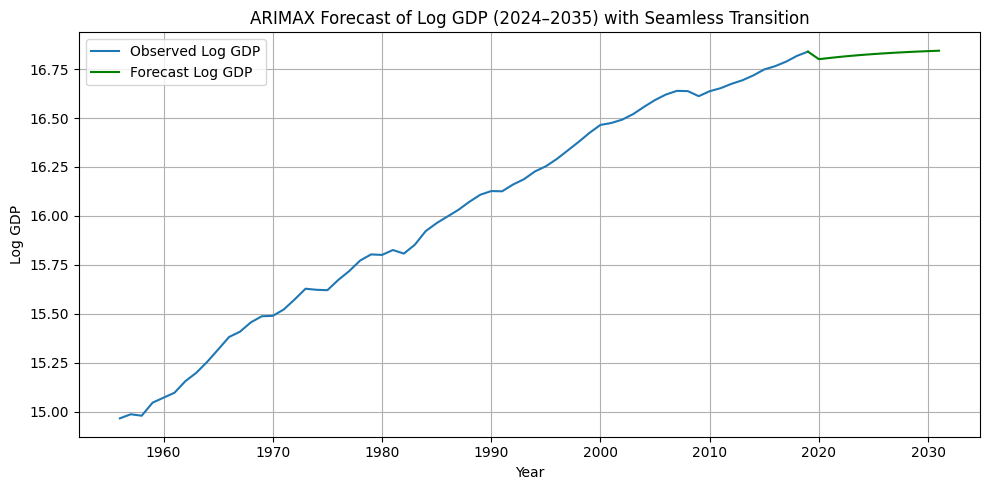

In [ ]:
# Append last observed log_gdp (2023) to the beginning of forecast
joined_years = [dt['year'].iloc[-1]] + future_years
joined_forecast = [dt['log_gdp'].iloc[-1]] + list(forecast_log_gdp)

# Then plot
plt.figure(figsize=(10, 5))
plt.plot(dt['year'], dt['log_gdp'], label='Observed Log GDP')
plt.plot(joined_years, joined_forecast, label='Forecast Log GDP', color='green')

# Add CI if you want (shift conf_int to match joined_years)
plt.title("ARIMAX Forecast of Log GDP (2024–2035) with Seamless Transition")
plt.xlabel("Year")
plt.ylabel("Log GDP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

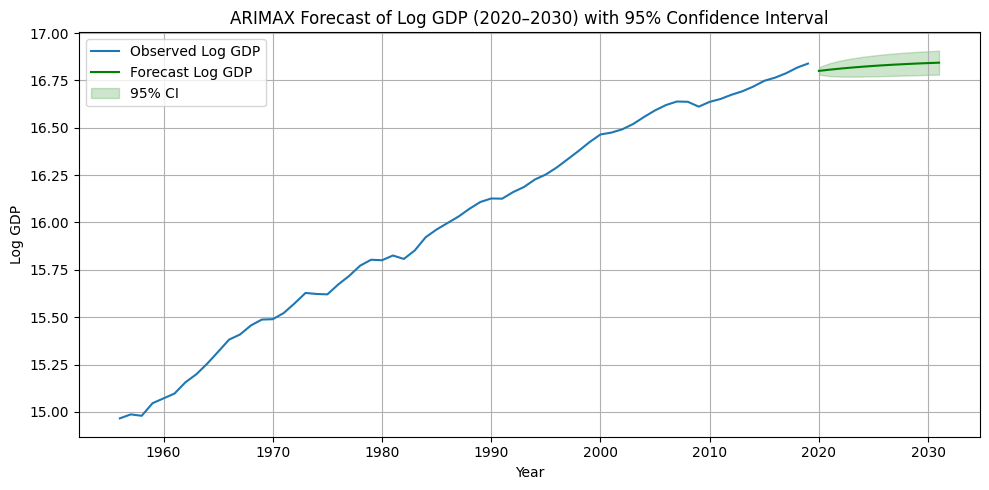

In [ ]:
# Step 1: Get confidence intervals (default = 95%)
conf_int = forecast_result.conf_int()

# Step 2: Plot log-GDP forecast with CI
plt.figure(figsize=(10, 5))
plt.plot(dt['year'], dt['log_gdp'], label='Observed Log GDP')
plt.plot(future_years, forecast_log_gdp, label='Forecast Log GDP', color='green')

# Add shaded 95% CI
plt.fill_between(future_years,
                 conf_int.iloc[:, 0],  # lower bound
                 conf_int.iloc[:, 1],  # upper bound
                 color='green', alpha=0.2, label='95% CI')

# ✅ Update the title to reflect forecast horizon (2020–2030)
plt.title('ARIMAX Forecast of Log GDP (2020–2030) with 95% Confidence Interval')

plt.xlabel('Year')
plt.ylabel('Log GDP')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-139-671377701.py:22: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  y.index = pd.date_range(start=f'{start_year}', periods=len(y), freq='A')


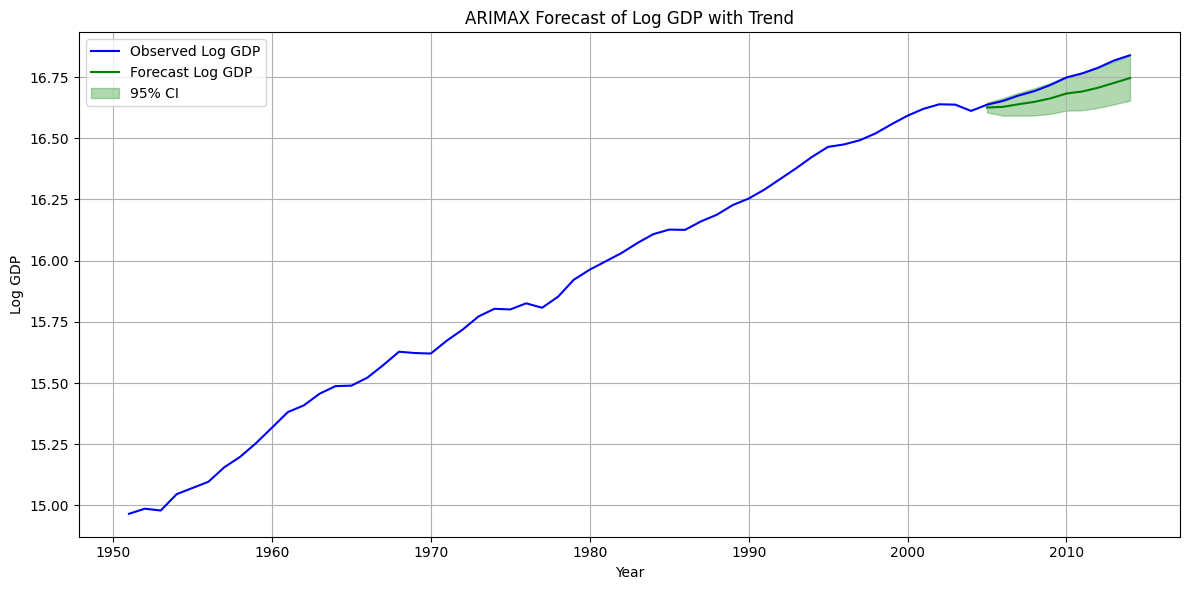

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ============================
# 1. Prepare Data
# ============================
# y = log GDP series
# X = exogenous vars (TFP, Capital)
forecast_steps = 10  # number of future periods

# ✅ Ensure the index has proper datetime years
if not isinstance(y.index, pd.DatetimeIndex):
    # If the index is numeric or string representing years
    try:
        y.index = pd.to_datetime(y.index.astype(str), format='%Y')
        X.index = y.index
    except:
        # If it fails, assume annual data starting from a known year
        start_year = 1950  # Change based on your dataset
        y.index = pd.date_range(start=f'{start_year}', periods=len(y), freq='A')
        X.index = y.index

# ============================
# 2. Train-Test Split
# ============================
split_point = len(y) - forecast_steps
train = y.iloc[:split_point]
test = y.iloc[split_point:]
X_train = X.iloc[:split_point]
future_X = X.iloc[split_point:]

# ============================
# 3. Fit ARIMAX with Trend
# ============================
model = SARIMAX(train, exog=X_train, order=(1, 1, 1), trend='t')  # 't' adds linear trend
results = model.fit(disp=False)

# ============================
# 4. Forecast
# ============================
forecast_res = results.get_forecast(steps=forecast_steps, exog=future_X)
forecast_mean = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

# ✅ Assign proper datetime index to forecast
forecast_mean.index = test.index
conf_int.index = test.index

# ============================
# 5. Plot with Years
# ============================
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Observed Log GDP', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast Log GDP', color='green')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='green', alpha=0.3, label='95% CI')

plt.title('ARIMAX Forecast of Log GDP with Trend')
plt.xlabel('Year')
plt.ylabel('Log GDP')

# ✅ Show proper year labels
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))  # tick every 10 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

Scenario Simulation

In [ ]:
# Step 1: Calculate average TFP growth from 2000–2023
tfp_growth_recent = dt.loc[dt['year'] >= 2000, 'log_tfp'].diff().mean()
print(f"Recent avg TFP growth = {tfp_growth_recent:.4f}")

Recent avg TFP growth = 0.0058


In [ ]:
# Create 12-year scenario vectors (2024–2035)
n_years = 12

# Scenario 1: Baseline (continue recent trend)
tfp_growth_baseline = [tfp_growth_recent] * n_years

# Scenario 2: Moderate Rebound
tfp_growth_moderate = [tfp_growth_recent + 0.005] * n_years

# Scenario 3: High Innovation
tfp_growth_high = [tfp_growth_recent + 0.010] * n_years

In [ ]:
last_log_tfp = dt['log_tfp'].iloc[-1]

def simulate_log_tfp_path(start_value, growth_list):
    return np.array([start_value + sum(growth_list[:i+1]) for i in range(len(growth_list))])

tfp_baseline_path = simulate_log_tfp_path(last_log_tfp, tfp_growth_baseline)
tfp_moderate_path = simulate_log_tfp_path(last_log_tfp, tfp_growth_moderate)
tfp_high_path = simulate_log_tfp_path(last_log_tfp, tfp_growth_high)

In [ ]:
last_log_capital = dt['log_capital'].iloc[-1]
capital_path = [last_log_capital] * n_years

In [ ]:
# Function to forecast log_gdp given a TFP path
def forecast_gdp_from_scenario(log_tfp_path, log_cap_path):
    exog_future = pd.DataFrame({
        'log_tfp': log_tfp_path,
        'log_capital': log_cap_path
    })
    forecast = arimax_result.get_forecast(steps=n_years, exog=exog_future)
    return forecast.predicted_mean, forecast.conf_int()

In [ ]:
log_gdp_baseline, _ = forecast_gdp_from_scenario(tfp_baseline_path, capital_path)
log_gdp_moderate, _ = forecast_gdp_from_scenario(tfp_moderate_path, capital_path)
log_gdp_high, _ = forecast_gdp_from_scenario(tfp_high_path, capital_path)

future_years = list(range(dt['year'].max() + 1, dt['year'].max() + 1 + n_years))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


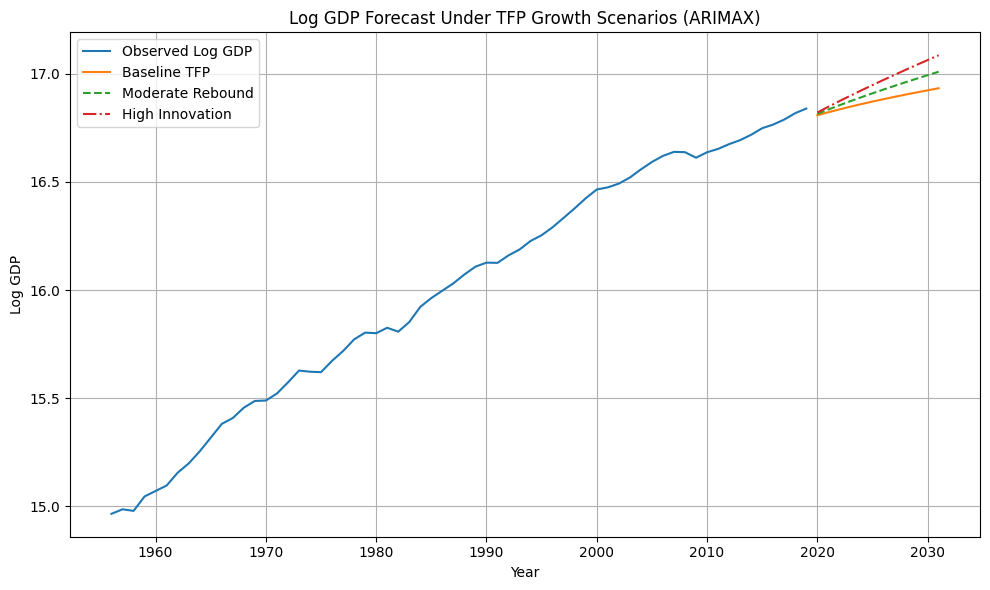

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dt['year'], dt['log_gdp'], label='Observed Log GDP')
plt.plot(future_years, log_gdp_baseline, label='Baseline TFP', linestyle='-')
plt.plot(future_years, log_gdp_moderate, label='Moderate Rebound', linestyle='--')
plt.plot(future_years, log_gdp_high, label='High Innovation', linestyle='-.')
plt.title('Log GDP Forecast Under TFP Growth Scenarios (ARIMAX)')
plt.xlabel('Year')
plt.ylabel('Log GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation and Policy Discussion

In [ ]:
var_model.summary()
# Manually extract and discuss coefficients

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Jul, 2025
Time:                     05:54:46
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -29.7789
Nobs:                     52.0000    HQIC:                  -30.2648
Log likelihood:           594.384    FPE:                5.33484e-14
AIC:                     -30.5669    Det(Omega_mle):     3.65238e-14
--------------------------------------------------------------------
Results for equation dlog_gdp
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.026349         0.019083            1.381           0.167
L1.dlog_gdp            -0.251237         0.501833           -0.501           0.617
L1.dlog_tfp             0.785929         0.632338

<Axes: >

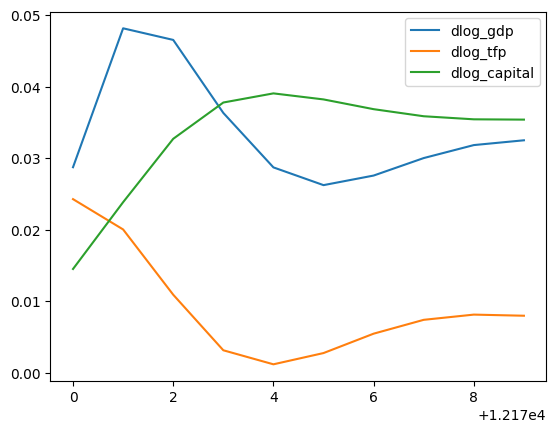

In [ ]:
forecast_df[['dlog_gdp', 'dlog_tfp', 'dlog_capital']].plot()

In [ ]:
print("Avg GDP growth:", dt['dlog_gdp'].mean())
print("Avg TFP growth:", dt['dlog_tfp'].mean())
print("Avg Capital growth:", dt['dlog_capital'].mean())

Avg GDP growth: 0.029597636527011806
Avg TFP growth: 0.006458818965063433
Avg Capital growth: 0.03365078532477621
